<a href="https://colab.research.google.com/github/hamedranjbar/Python/blob/main/Hamed_class_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Add Library hamed

---




In [1]:
!cp -r /content/drive/MyDrive/Dataset  /content/data


In [58]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['cat','dog']
flat_data_arr=[] #input array 
target_arr=[] #output array
datadir='/content/data' 
#path which contains all the categories of images
for i in Categories:
      print(f'loading... category : {i}')  
      path=os.path.join(datadir,i) 
      for img in os.listdir(path):    
        img_array=imread(os.path.join(path,img))    
        img_resized=resize(img_array,(150,150,3))      
        flat_data_arr.append(img_resized.flatten())      
        target_arr.append(Categories.index(i)) 
      print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe




loading... category : cat
loaded category:cat successfully
loading... category : dog
loaded category:dog successfully


In [ ]:
df

In [59]:
#df['Target']=targetx=df.iloc[:,:] #input data
x=np.array(df)
y=target
print(x.shape)

(12, 67500)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
add libaray1

In [60]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [61]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


The Model is trained well with the given images


SVC

In [62]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0]
The actual data is:
[0 1 1]
The model is 33.33333333333333% accurate


Knn

RMSE value for k=  1 is: 0.816496580927726
RMSE value for k=  2 is: 0.7071067811865476
RMSE value for k=  3 is: 0.6666666666666667
RMSE value for k=  4 is: 0.5
RMSE value for k=  5 is: 0.5416025603090641
RMSE value for k=  6 is: 0.5610836076867821
RMSE value for k=  7 is: 0.5832118435198043
RMSE value for k=  8 is: 0.5448623679425842
RMSE value for k=  9 is: 0.5211573066470477
minumum ==  0.5


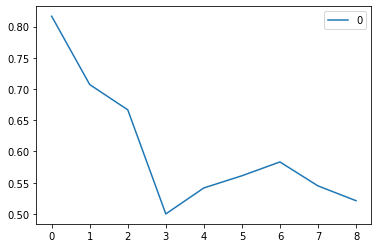

In [82]:
from math import sqrt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
rmse_val=[]
for K in range(9):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

print('minumum == ',np.amin(rmse_val))

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
_=curve.plot()

In [ ]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')

print("The predicted image is : "+Categories[model.predict(l)[0]])